In [1]:
# import Dependencies
%matplotlib notebook
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from config import api_key
import time
from datetime import datetime

In [2]:
#Define the latitudes and longitudes used
latitude = np.random.uniform(low=-90,high=90,size=1500)
longitude = np.random.uniform(low=-180,high=180,size=1500)
lat_longs = zip(latitude,longitude)

In [3]:
#Define the cities names 
cities=[]
#country=[]
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0],lat_long[1]).city_name
    country_codes= citipy.nearest_city(lat_long[0],lat_long[1]).country_code
    if (city.lower()) not in cities:
        cities.append((city.lower()))
        #country.append(country_codes)
len(cities)

618

In [4]:
#Making the API calls to get the required information
temperatures = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
long = []
date=[]
new_cities=[]
new_country=[]
counter = 0
set_counter = 1
#cities=["guymon"]
print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    try:
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&APPID={api_key}"  
        response = requests.get(url).json()
        temperature = response["main"]["temp_max"]
        humid = response["main"]["humidity"]
        clouds = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        city_latitude = response["coord"]["lat"]
        city_longitude= response["coord"]["lon"]
        temp_date = (datetime.utcfromtimestamp(response["dt"])).strftime("%Y-%m-%d %H:%M:%S.%f+00:00 (UTC)")
        new_cities_names = response["name"].lower()
        new_country_name = response["sys"]["country"]
        
        temperatures.append(temperature)
        humidity.append(humid)
        cloudiness.append(clouds)
        wind_speed.append(wind)
        lat.append(city_latitude)
        long.append(city_longitude)
        date.append(temp_date)
        new_cities.append(new_cities_names)
        new_country.append(new_country_name)
        if counter == 50:
            counter = 1
            set_counter +=1
        else: counter += 1
        print(f"Processing Record {counter} of Set {set_counter} | {city}")
    except :
        cities.remove(city)
        print(f"city {city} not found. Skipping....")
        #skip=True
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | torbay
city umm durman not found. Skipping....
city bengkulu not found. Skipping....
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | kota kinabalu
Processing Record 9 of Set 1 | sarangani
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | xichang
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | chara
city bargal not found. Skipping....
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | saint anthony
Processing Record 17 of Set 1 | hilo
city tsihombe not found. Skipping....
Processing Record 18 of Set 1 | nova esperanca
Processing Record 19 of Set 1 | longyearbyen
Processing

Processing Record 25 of Set 4 | san jeronimo
Processing Record 26 of Set 4 | miyako
Processing Record 27 of Set 4 | danilov
Processing Record 28 of Set 4 | havre
Processing Record 29 of Set 4 | mangai
Processing Record 30 of Set 4 | tosya
city januaria not found. Skipping....
Processing Record 31 of Set 4 | thinadhoo
Processing Record 32 of Set 4 | ciudad guayana
city hendijan not found. Skipping....
Processing Record 33 of Set 4 | ituiutaba
Processing Record 34 of Set 4 | ahuimanu
Processing Record 35 of Set 4 | bartica
city duz not found. Skipping....
Processing Record 36 of Set 4 | zhigansk
Processing Record 37 of Set 4 | ibra
Processing Record 38 of Set 4 | hovd
Processing Record 39 of Set 4 | jequitinhonha
Processing Record 40 of Set 4 | orotukan
Processing Record 41 of Set 4 | umm kaddadah
Processing Record 42 of Set 4 | ust-maya
Processing Record 43 of Set 4 | rosarito
Processing Record 44 of Set 4 | hirara
Processing Record 45 of Set 4 | port elizabeth
city karkaralinsk not fou

Processing Record 1 of Set 8 | hamilton
Processing Record 2 of Set 8 | xiaoweizhai
Processing Record 3 of Set 8 | zeya
Processing Record 4 of Set 8 | la peca
Processing Record 5 of Set 8 | maraa
Processing Record 6 of Set 8 | zlitan
Processing Record 7 of Set 8 | caravelas
Processing Record 8 of Set 8 | ereymentau
Processing Record 9 of Set 8 | gamba
city ksenyevka not found. Skipping....
Processing Record 10 of Set 8 | abaete
Processing Record 11 of Set 8 | todos santos
Processing Record 12 of Set 8 | cherskiy
Processing Record 13 of Set 8 | baruun-urt
Processing Record 14 of Set 8 | metro
Processing Record 15 of Set 8 | taltal
Processing Record 16 of Set 8 | ojinaga
Processing Record 17 of Set 8 | marienburg
Processing Record 18 of Set 8 | kavaratti
city fianga not found. Skipping....
Processing Record 19 of Set 8 | bathsheba
Processing Record 20 of Set 8 | beyneu
city othonoi not found. Skipping....
Processing Record 21 of Set 8 | algiers
Processing Record 22 of Set 8 | lazarev
Proc

In [ ]:
#def Diff(li1, li2): 
 #   li_dif = [i for i in li1 + li2 if i not in li1 or i not in li2] 
  #  return li_dif 

In [ ]:
#(Diff(cities,new_cities))

In [ ]:
#var= "kijang"
#if var in cities:
#    print("True")
#else: print("False")

In [ ]:
#my_dictionary = pd.DataFrame({"NewCity": new_cities})
#my_dictionary.to_excel("output.xls", encoding="UTF-08")

In [5]:
output_df = pd.DataFrame({"City": new_cities,
          "Country" :new_country,
          "Max Temp": temperatures,
          "Humidity": humidity,
          "Cloudiness": cloudiness,
          "Wind Speed": wind_speed,
          "Latitude": lat,
          "Longitude": long,
          "Date": date
         })
output_df.to_csv("output/citiesdata.csv")

In [6]:
output_df.head(10)

,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Date
0,bluff,AU,81.60,29,0,10.47,-23.58,149.07,2018-09-11 05:24:19.000000+00:00 (UTC)
1,ushuaia,AR,42.80,75,20,18.34,-54.81,-68.31,2018-09-11 04:00:00.000000+00:00 (UTC)
2,torbay,CA,50.00,81,20,9.17,47.66,-52.73,2018-09-11 05:00:00.000000+00:00 (UTC)
3,tuatapere,NZ,48.66,100,8,7.11,-46.13,167.69,2018-09-11 05:23:27.000000+00:00 (UTC)
4,kavieng,PG,80.88,100,64,3.42,-2.57,150.80,2018-09-11 05:24:22.000000+00:00 (UTC)
5,puerto ayora,EC,70.26,100,0,10.80,-0.74,-90.35,2018-09-11 05:24:22.000000+00:00 (UTC)
6,busselton,AU,58.56,100,80,13.82,-33.64,115.35,2018-09-11 05:23:06.000000+00:00 (UTC)
7,kota kinabalu,MY,91.40,66,75,3.36,5.98,116.07,2018-09-11 05:00:00.000000+00:00 (UTC)
8,sarangani,PH,83.58,97,12,18.07,5.40,125.46,2018-09-11 05:24:02.000000+00:00 (UTC)
9,souillac,FR,57.20,93,40,3.36,45.60,-0.60,2018-09-11 05:00:00.000000+00:00 (UTC)


<IPython.core.display.Javascript object>


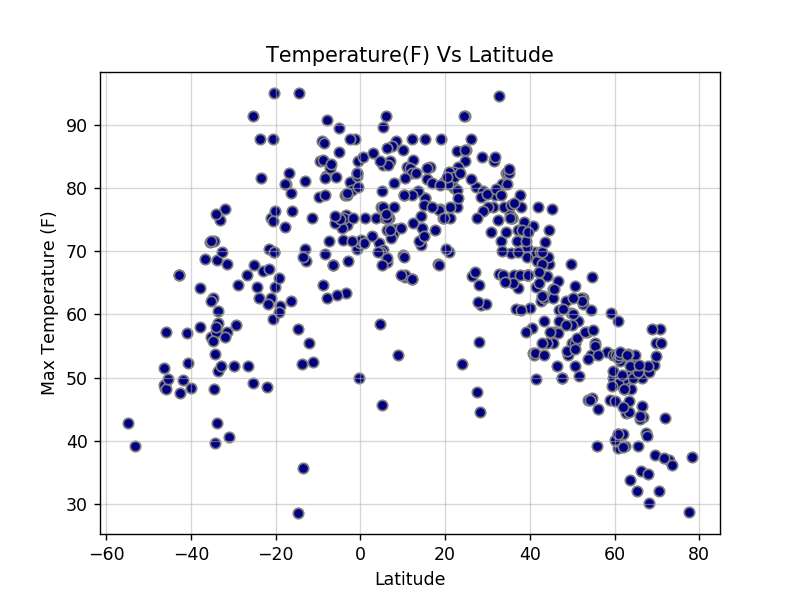

In [7]:
fig, ax = plt.subplots()
ax.scatter(output_df["Latitude"],output_df["Max Temp"],color="navy", edgecolor="gray")
plt.title("Temperature(F) Vs Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(alpha=0.5)
plt.savefig("output/TemperaturevsLatitude.png")

<IPython.core.display.Javascript object>


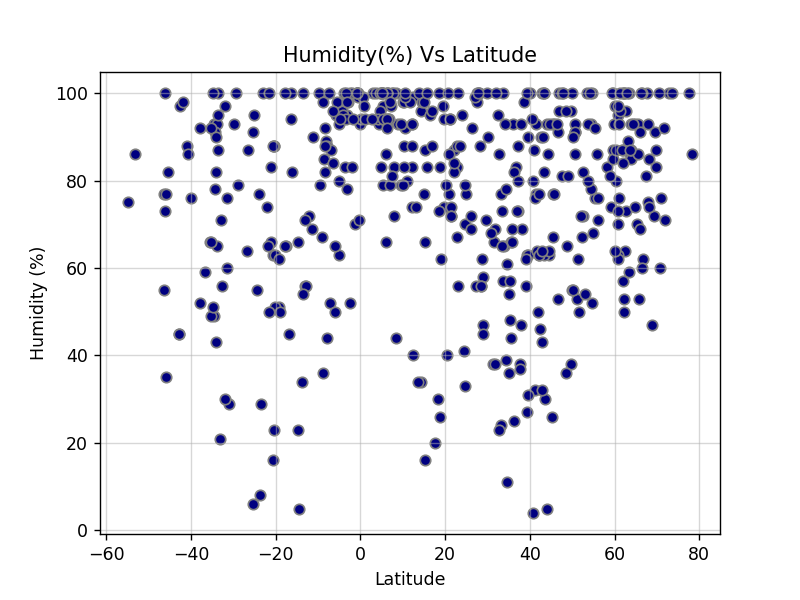

In [8]:
fig2, ax2 =plt.subplots()
ax2.scatter(output_df["Latitude"],output_df["Humidity"],color="navy", edgecolor="gray")
plt.title("Humidity(%) Vs Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(alpha=0.5)
plt.savefig("output/HumidityvsLatitude.png")

<IPython.core.display.Javascript object>


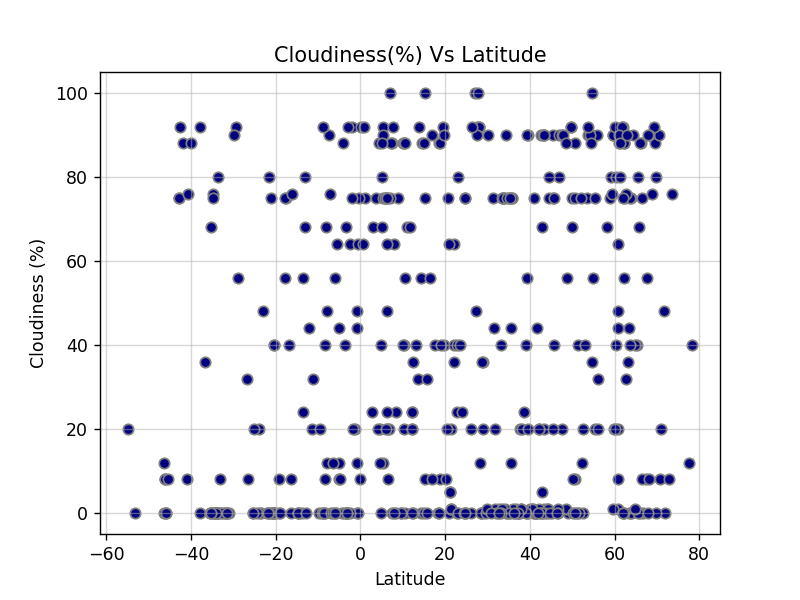

In [9]:
fig3, ax3 = plt.subplots()
ax3.scatter(output_df["Latitude"],output_df["Cloudiness"],color="navy", edgecolor="gray")
plt.title("Cloudiness(%) Vs Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(alpha=0.5)
plt.savefig("output/CloudinessvsLatitude.png")

<IPython.core.display.Javascript object>


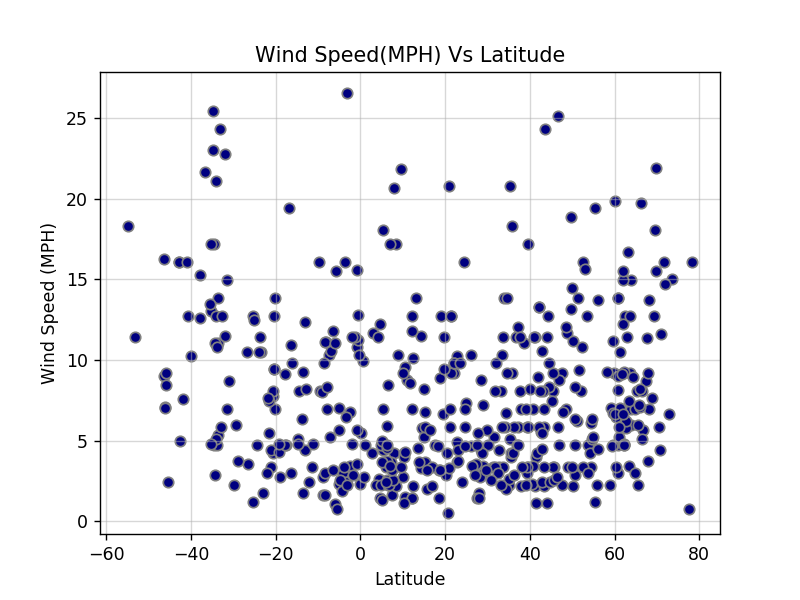

In [10]:
fig4, ax4=plt.subplots()
ax4.scatter(output_df["Latitude"],output_df["Wind Speed"],color="navy", edgecolor="gray")
plt.title("Wind Speed(MPH) Vs Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(alpha=0.5)
plt.savefig("output/WindSpeedvsLatitude.png")

# Observations from the Weather Map API are:
. Through the center of earth (0 latitude) the temperature seems to be higher.
